学习资料来源：https://github.com/zergtant/pytorch-handbook/blob/master/chapter1/1.3-deep-learning-with-pytorch-60-minute-blitz.md
# 官方60min快速入门

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
%matplotlib inline
#可以直接在控制台显示图片
from __future__ import print_function # print函数需要按照python3的版本使用，没啥用对python3

## 张量

### 基本语法
* empty, ones, zeros  和numpy语法基本一致，torch不用必须加括号
* 随机不同
* torch.tensor
* x.new_ones(size)用现有张量创建新张量，继承例如dtype的属性（也可以覆盖）
* 注意随机是torch.randn_like(x,dtype)——size相同
* 张量的size就是numpy的shape，返回tuple类型

In [2]:
x = torch.empty(5,3)
x

tensor([[7.1118e-04, 1.7444e+28, 7.3909e+22],
        [1.8727e+31, 1.4182e-19, 4.6168e+24],
        [4.2964e+24, 1.2514e-14, 8.9634e-33],
        [7.1345e+31, 7.1118e-04, 1.7444e+28],
        [7.3909e+22, 1.8727e+31, 1.3179e+25]])

注意随机与np不同

In [3]:
np.random.rand(5,4)
torch.rand(5,4) 

tensor([[0.1816, 0.8544, 0.8596, 0.9960],
        [0.8540, 0.9287, 0.0634, 0.4754],
        [0.6223, 0.5609, 0.2511, 0.0973],
        [0.4158, 0.1451, 0.5508, 0.6131],
        [0.0632, 0.5351, 0.8521, 0.3550]])

In [4]:
x = torch.tensor([5.5, 3],dtype = torch.float)
x

tensor([5.5000, 3.0000])

In [5]:
x = x.new_ones(5,3)
x = x.new_zeros(5,3)
torch.rand_like(x)

tensor([[0.0772, 0.5509, 0.1809],
        [0.3924, 0.1594, 0.8537],
        [0.4111, 0.7254, 0.1467],
        [0.2207, 0.2821, 0.6530],
        [0.5709, 0.6686, 0.2106]])

In [6]:
x.size() == x.shape # 返回tuple类型

True

### 基本运算
* 加法1、2
* 替换

* add可以提供输出

In [7]:
y = torch.rand(5,3)
x + y

tensor([[0.4795, 0.8546, 0.4659],
        [0.0204, 0.5176, 0.1152],
        [0.6635, 0.1203, 0.6060],
        [0.5303, 0.2482, 0.6438],
        [0.6119, 0.8016, 0.6069]])

In [8]:
torch.add(x,y) == x+y

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [9]:
result = torch.empty(5,3)
torch.add(x,y,out = result)

tensor([[0.4795, 0.8546, 0.4659],
        [0.0204, 0.5176, 0.1152],
        [0.6635, 0.1203, 0.6060],
        [0.5303, 0.2482, 0.6438],
        [0.6119, 0.8016, 0.6069]])

In [10]:
x = torch.ones(5,3)

<div class = "alert alert-info"><h4>Note<p>任何以"_"结尾的操作都会用结果替换原变量。

In [11]:
y.add_(x)

tensor([[1.4795, 1.8546, 1.4659],
        [1.0204, 1.5176, 1.1152],
        [1.6635, 1.1203, 1.6060],
        [1.5303, 1.2482, 1.6438],
        [1.6119, 1.8016, 1.6069]])

In [12]:
x.copy_(y)

tensor([[1.4795, 1.8546, 1.4659],
        [1.0204, 1.5176, 1.1152],
        [1.6635, 1.1203, 1.6060],
        [1.5303, 1.2482, 1.6438],
        [1.6119, 1.8016, 1.6069]])

In [13]:
x.t_()

tensor([[1.4795, 1.0204, 1.6635, 1.5303, 1.6119],
        [1.8546, 1.5176, 1.1203, 1.2482, 1.8016],
        [1.4659, 1.1152, 1.6060, 1.6438, 1.6069]])

### 索引、变形
* 索引和numpy差不多
* 变形用view（reshape）
* 如果你有只有一个元素的张量，使用.item()来得到Python数据类型的数值

In [14]:
x[:,3]

tensor([1.5303, 1.2482, 1.6438])

In [15]:
x.size()

torch.Size([3, 5])

In [16]:
x.contiguous().view(5,3)
# 搞不懂为啥这里不加.contiguous()就会报错

tensor([[1.4795, 1.0204, 1.6635],
        [1.5303, 1.6119, 1.8546],
        [1.5176, 1.1203, 1.2482],
        [1.8016, 1.4659, 1.1152],
        [1.6060, 1.6438, 1.6069]])

In [17]:
x.reshape(15)

tensor([1.4795, 1.0204, 1.6635, 1.5303, 1.6119, 1.8546, 1.5176, 1.1203, 1.2482,
        1.8016, 1.4659, 1.1152, 1.6060, 1.6438, 1.6069])

In [18]:
x = torch.randn(4,4)
y = x.view(16)
x.view(16)
z = x.view(-1,8)
x.size(), y.size(), z.size()

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

In [19]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.4179])
0.41790953278541565


### NumPy转换
* 两者共享底层内存地址，修改一个会导致另一个的变化。

Tensor → NumPy

In [20]:
a = torch.ones(5)
b = a.numpy()
b,a

(array([1., 1., 1., 1., 1.], dtype=float32), tensor([1., 1., 1., 1., 1.]))

In [21]:
a.add_(1)
a,b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

Numpy → Tensor

``torch.from_numpy(array)``

In [22]:
a = np.ones(5)
b = torch.from_numpy(a)
a,b

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [23]:
np.add(a,1,out = a)
a,b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到 NumPy 的转换.

### CUDA张量
* ``.to``方法可以将Tensor移动到任何设备中

In [24]:
torch.cuda.is_available()

True

In [25]:
torch.device('cuda')
torch.device('cpu')

device(type='cpu')

In [26]:
# if torch.cuda.is_available():
device = torch.device('cuda')
y_1 = torch.ones_like(x, device = device)
x_1 = x.to(device)
z_1 = x_1 + y_1
z_1

tensor([1.4179], device='cuda:0')

In [27]:
y_1 + z_1

tensor([2.4179], device='cuda:0')

In [28]:
z_1 = z_1.to('cpu')
z_1

tensor([1.4179])

In [29]:
z_1.to("cpu")

tensor([1.4179])

In [30]:
# y_1 + z_1
'''
Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!
'''

'\nExpected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!\n'

In [31]:
y_2 = torch.ones_like(x, device = 'cuda')
x_2 = x.to("cuda")
z_2 = y_2 + x_2

x_1 == x_2, y_1 == y_2

(tensor([True], device='cuda:0'), tensor([True], device='cuda:0'))

In [32]:
#  z_1 == z_2
'''
Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!
'''

'\nExpected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!\n'

### 更多
100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described here <https://pytorch.org/docs/torch>_.

# Autograd:自动求导机制
## Tensor 张量

* ```torch.Tensor```是这个包的核心类
* 如果设置```.requires_grad```为```True```,会追踪所有对于该张量的操作
* ```.backward()```自动计算所有的梯度，积累到```.grad```属性
* ```.detach()```方法将张量与其计算历史记录分离，禁止跟踪它将来的计算记录
* ```with torch.no_grad():```将代码块包装其中，以阻止跟踪历史记录占用内存。在评估模型时特别有用，因为模型可能具有```requires_grad = True```的可训练参数，但是我们不需要梯度计算。
* ```Function```是另一个自动梯度计算的重要类

Tensor 和 Function互相连接并生成一个非循环图，它表示和存储了完整的计算历史。 每个张量都有一个```.grad_fn```属性，这个属性引用了一个创建了Tensor的Function（除非这个张量是用户手动创建的，即，这个张量的 ```grad_fn ```是 ```None```）。

如果需要计算导数，你可以在```Tensor```上调用```.backward()```。 如果Tensor是一个标量（即它包含一个元素数据）则不需要为```backward()```指定任何参数， 但是如果它有更多的元素，你需要指定一个```gradient``` 参数来匹配张量的形状。

创建一个张量并设置追踪他的计算历史

In [33]:
import torch
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [34]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

结果y已经被计算出来了，所以，grad_fn已经被自动生成了。

In [35]:
y.grad_fn

对y进行一个操作

In [36]:
z = y * y * 3
out = z.mean()

z, out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

```.requires_grad_( ... ) ```可以改变现有张量的```requires_grad```属性。 如果没有指定的话，默认输入的```flag```是 ```False```。

In [37]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


## 梯度
<font color='red'>反向传播 </font>因为 ```out```是一个纯量```（scalar）```，```out.backward()``` 等于```out.backward(torch.tensor(1))```
* 啥意思？必须是标量对矩阵求导？？
* 雅可比矩阵是一阶偏导数以一定方式排列成的矩阵，类似于多元函数的导数
* ```torch.autograd```就是用来计算`vector-Jacobian product`的工具
* 基于链式法则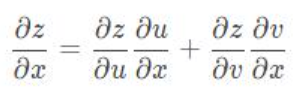

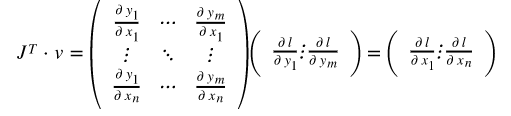
vector-Jacobian product 这种特性使得将外部梯度返回到具有非标量输出的模型变得非常方便。

In [38]:
out.backward()

print gradients ```d(out)/dx```

In [39]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [40]:
'''
    x.data可以去掉requires_grad属性，只保留值
    tensor.norm()是计算范数
'''
x = torch.randn(3, requires_grad=True)
i = 1
y = x + 2
while y.data.norm() < 1000:
    y = y * 2
    i *= 2
y

tensor([404.0619, 682.1380, 751.5862], grad_fn=<MulBackward0>)

<font color = 'red'> ``.backward()``括号里是啥玩意？？？

在这个情形中，y不再是个标量。`torch.autograd`无法直接计算出完整的雅可比行列，但是如果我们只想要`vector-Jacobian product`，只需将向量作为参数传入`backward`：

* 括号里面的参数是上面的$v$，<font color = 'red'>如果正好是某个标量函数$l = g(y)$的梯度的话</font>，就能求出来$l$关于$x$的梯度
* 总的来说`.backward()`括号中加一个向量就是原雅可比矩阵乘上括号中的向量
* <font color = 'red'>那原雅可比行列式又是啥玩意？</font>
* <font color = 'red'>就是说如果要输出一个向量y对向量x的雅可比矩阵，我括号里应该输入（1，1，1...）?</font>

In [41]:
gradients = torch.tensor([1, 1, 1], dtype = torch.float)
y.backward(gradients)

x.grad

tensor([256., 256., 256.])

In [42]:
y/(x+2)

tensor([256., 256., 256.], grad_fn=<DivBackward0>)

In [43]:
'''
    没搞懂为啥要取这个例子
'''
# gradients = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
# y.backward(gradients)

# x.grad

'\n    没搞懂为啥要取这个例子\n'

如果`.requires_grad=True`但是你有不希望进行autograd运算，那么可以把变量包裹在`with torch.no_grad()`中
* <font color = "red">`with`语句是个啥东西</font>

In [44]:
x.requires_grad

True

In [45]:
(x ** 2).requires_grad

True

In [46]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


### 再小试一下with torch.no_grad():
* 来源：https://zhuanlan.zhihu.com/p/386454263

In [47]:
a = torch.tensor([1.1], requires_grad=True)
b = a * 2
b

tensor([2.2000], grad_fn=<MulBackward0>)

grad_fn=\<MulBackward0>表示乘法的反向梯度函数

In [48]:
b.add_(2)

tensor([4.2000], grad_fn=<AddBackward0>)

grad_fn=\<AddBackward0>表明是add的反向梯度函数

In [49]:
with torch.no_grad():
    b.mul_(2)
b

tensor([8.4000], grad_fn=<AddBackward0>)

tensor([8.4000], grad_fn=\<AddBackward0>) 可以看到没有跟踪乘法的梯度，还是上面的加法的梯度函数，不过乘法是执行了的